In [12]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd

In [13]:
df = pd.read_csv('daily_data.csv')
df.head()

,day_id,city_id,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index,sunrise,sunset
0,D0001,C001,27.0,NaN,6.1,210,1006.0,0.0,54,75,28.0,10.0,6.0,11.9,2,06:04 AM,07:19 PM
1,D0002,C001,22.0,NaN,6.1,170,1006.0,0.0,73,75,24.5,10.0,1.0,23.4,1,06:05 AM,07:18 PM
2,D0003,C001,20.0,Light Rain with Thunder,3.6,10,1011.0,4.5,100,75,20.0,10.0,1.0,12.6,1,06:05 AM,07:18 PM
3,D0004,C001,17.0,Clear and Sunny,6.1,150,1018.0,0.0,88,0,17.0,10.0,1.0,11.2,1,06:06 AM,07:16 PM
4,D0005,C001,18.0,NaN,3.6,92,1019.0,0.0,94,0,18.0,10.0,1.0,9.0,1,06:07 AM,07:15 PM


In [14]:
df.shape

(2893, 17)

In [15]:
def convert_time_to_float(time_str):
    time, period = time_str.split()
    hour, minute = map(int, time.split(':'))
    return hour + minute / 60.0

# Apply the conversion
df['sunrise'] = df['sunrise'].apply(convert_time_to_float)
df['sunset'] = df['sunset'].apply(convert_time_to_float)

df.head()

,day_id,city_id,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index,sunrise,sunset
0,D0001,C001,27.0,NaN,6.1,210,1006.0,0.0,54,75,28.0,10.0,6.0,11.9,2,6.066667,7.316667
1,D0002,C001,22.0,NaN,6.1,170,1006.0,0.0,73,75,24.5,10.0,1.0,23.4,1,6.083333,7.300000
2,D0003,C001,20.0,Light Rain with Thunder,3.6,10,1011.0,4.5,100,75,20.0,10.0,1.0,12.6,1,6.083333,7.300000
3,D0004,C001,17.0,Clear and Sunny,6.1,150,1018.0,0.0,88,0,17.0,10.0,1.0,11.2,1,6.100000,7.266667
4,D0005,C001,18.0,NaN,3.6,92,1019.0,0.0,94,0,18.0,10.0,1.0,9.0,1,6.116667,7.250000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   day_id                    2893 non-null   object 
 1   city_id                   2893 non-null   object 
 2   temperature_celsius       2893 non-null   float64
 3   condition_text            479 non-null    object 
 4   wind_kph                  2893 non-null   float64
 5   wind_degree               2893 non-null   int64  
 6   pressure_mb               2893 non-null   float64
 7   precip_mm                 2893 non-null   float64
 8   humidity                  2893 non-null   int64  
 9   cloud                     2893 non-null   int64  
 10  feels_like_celsius        2893 non-null   float64
 11  visibility_km             2893 non-null   float64
 12  uv_index                  2893 non-null   float64
 13  gust_kph                  2893 non-null   float64
 14  air_qual

### **Select rows condition_text is not null**

In [17]:
df_not_null = df[df['condition_text'].notna()]
df_not_null.shape

(479, 17)

In [18]:
df_not_null.isna().sum()

day_id                      0
city_id                     0
temperature_celsius         0
condition_text              0
wind_kph                    0
wind_degree                 0
pressure_mb                 0
precip_mm                   0
humidity                    0
cloud                       0
feels_like_celsius          0
visibility_km               0
uv_index                    0
gust_kph                    0
air_quality_us-epa-index    0
sunrise                     0
sunset                      0
dtype: int64

In [19]:
df = df_not_null

In [20]:
df = df.drop_duplicates()
df.shape

(479, 17)

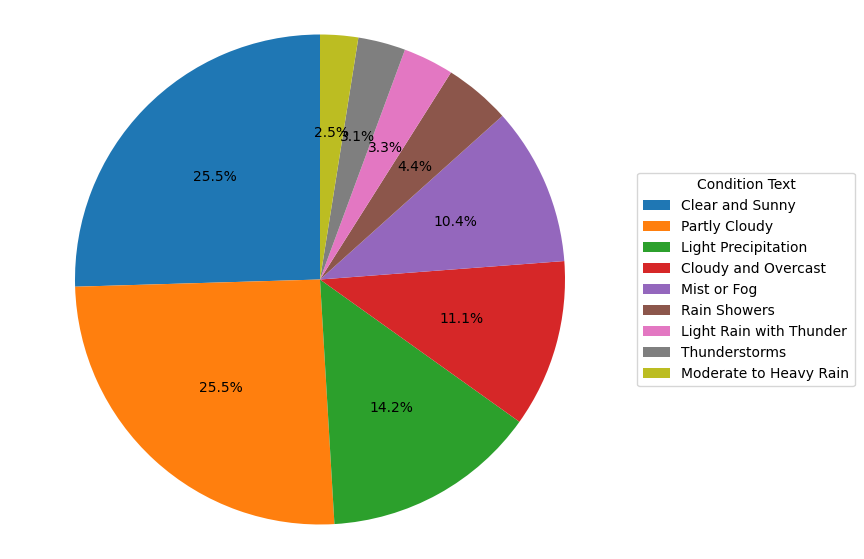

In [21]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 7))
wedges, texts, autotexts = plt.pie(df['condition_text'].value_counts(), 
                                   labels=[''] * df['condition_text'].nunique(), 
                                   autopct='%1.1f%%', 
                                   startangle=90)

plt.axis('equal')
plt.legend(wedges, df['condition_text'].value_counts().index, title="Condition Text", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()


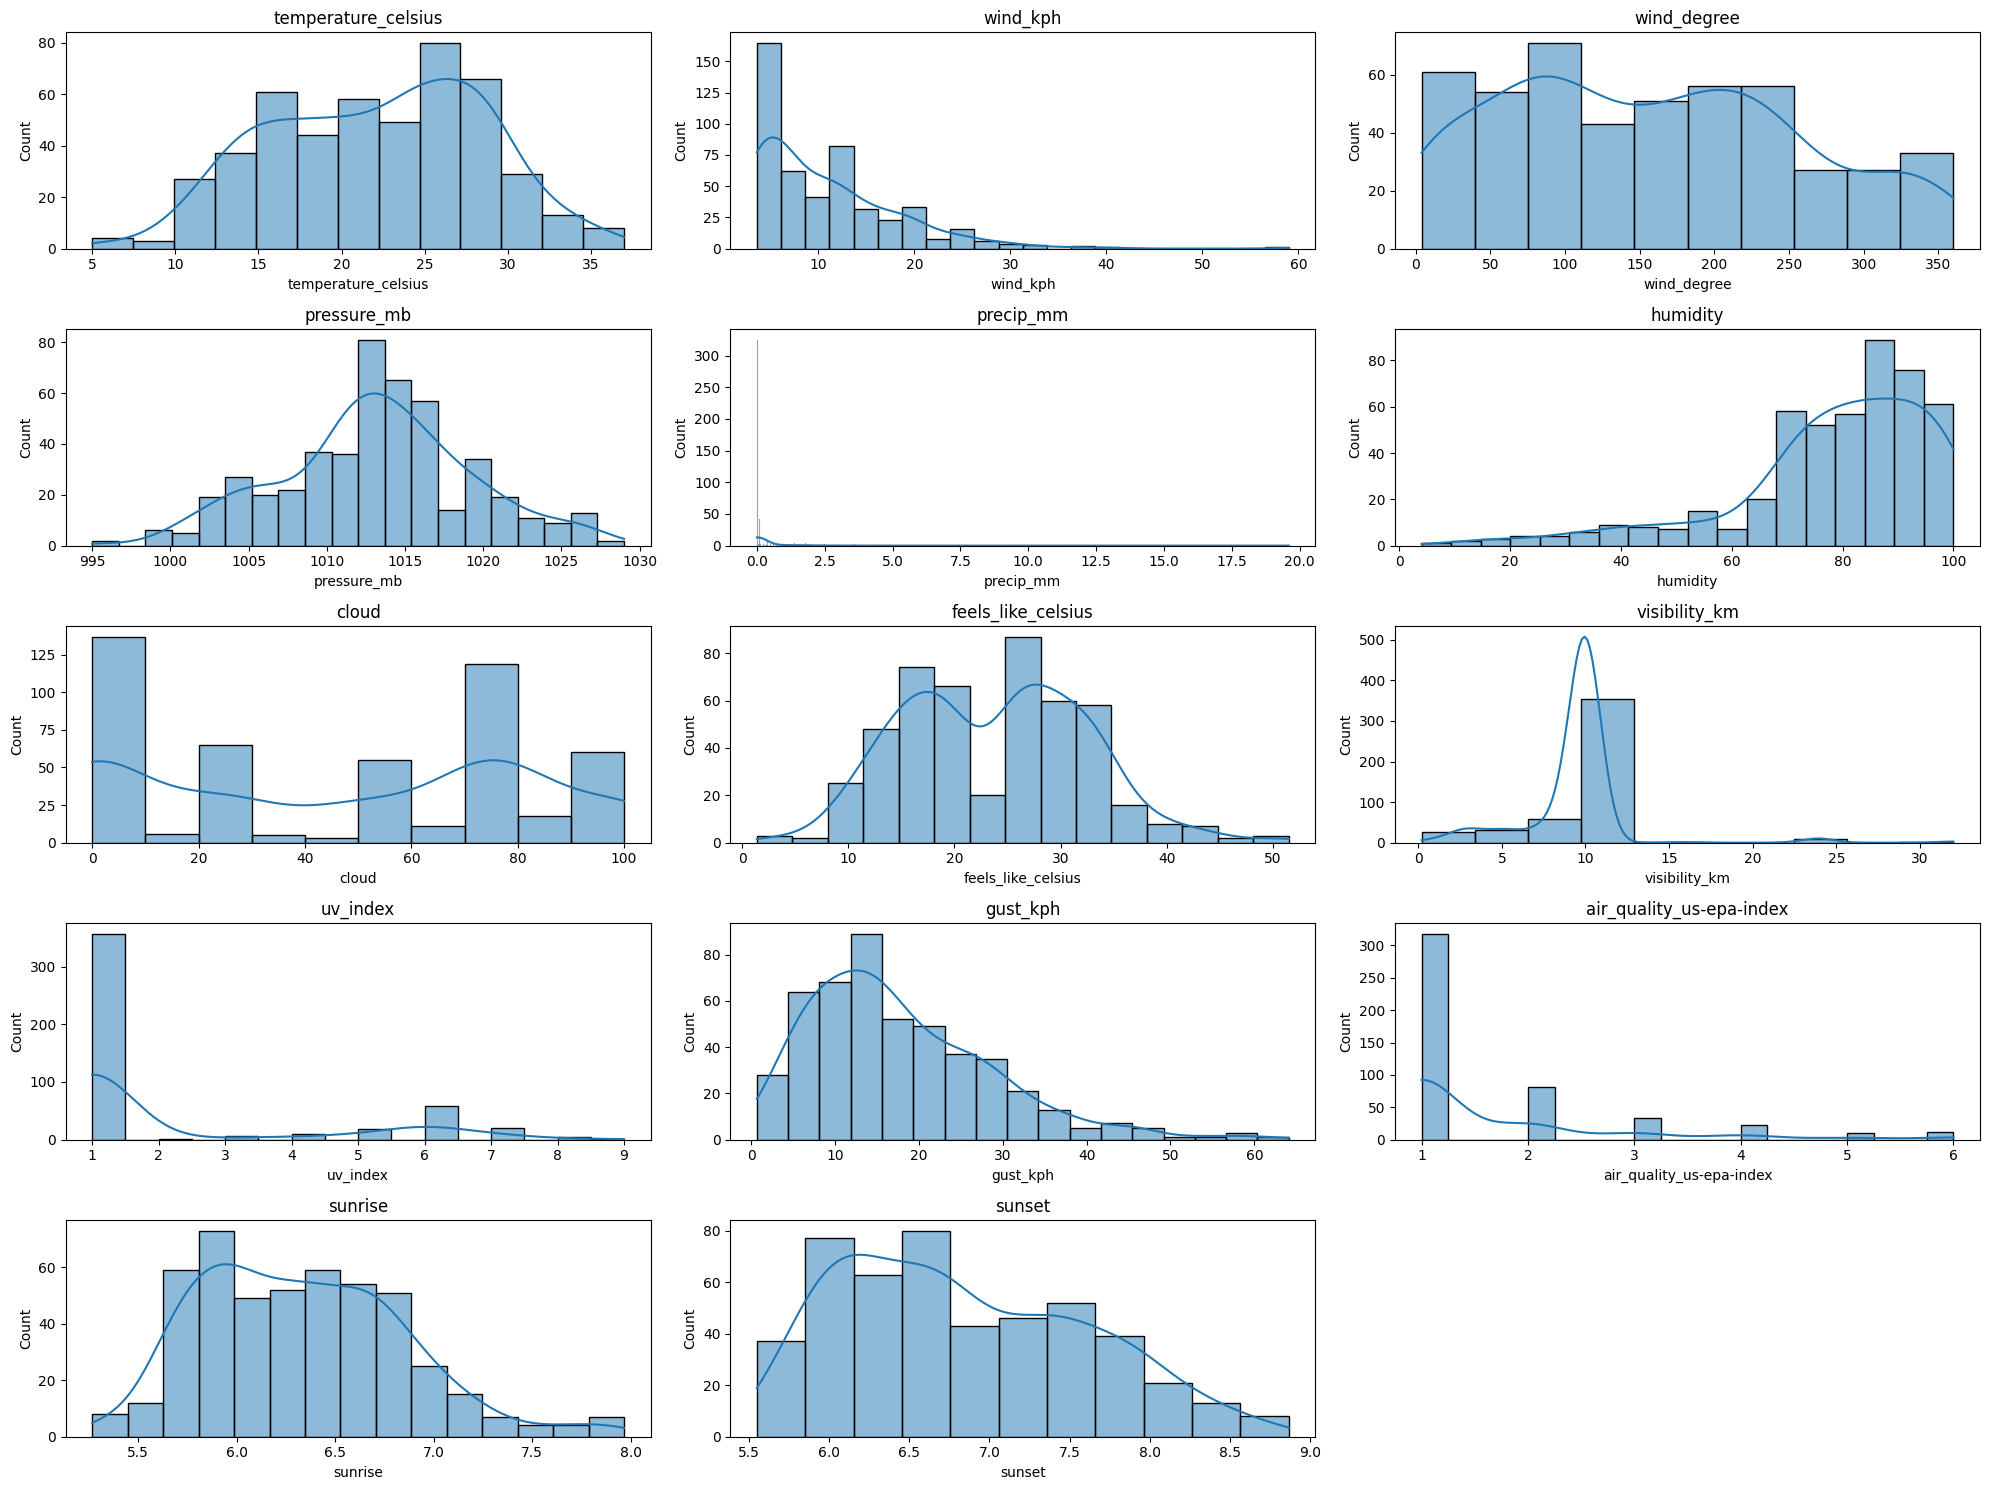

In [23]:
import seaborn as sns

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, 15)) 
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)  
    sns.histplot(df[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()


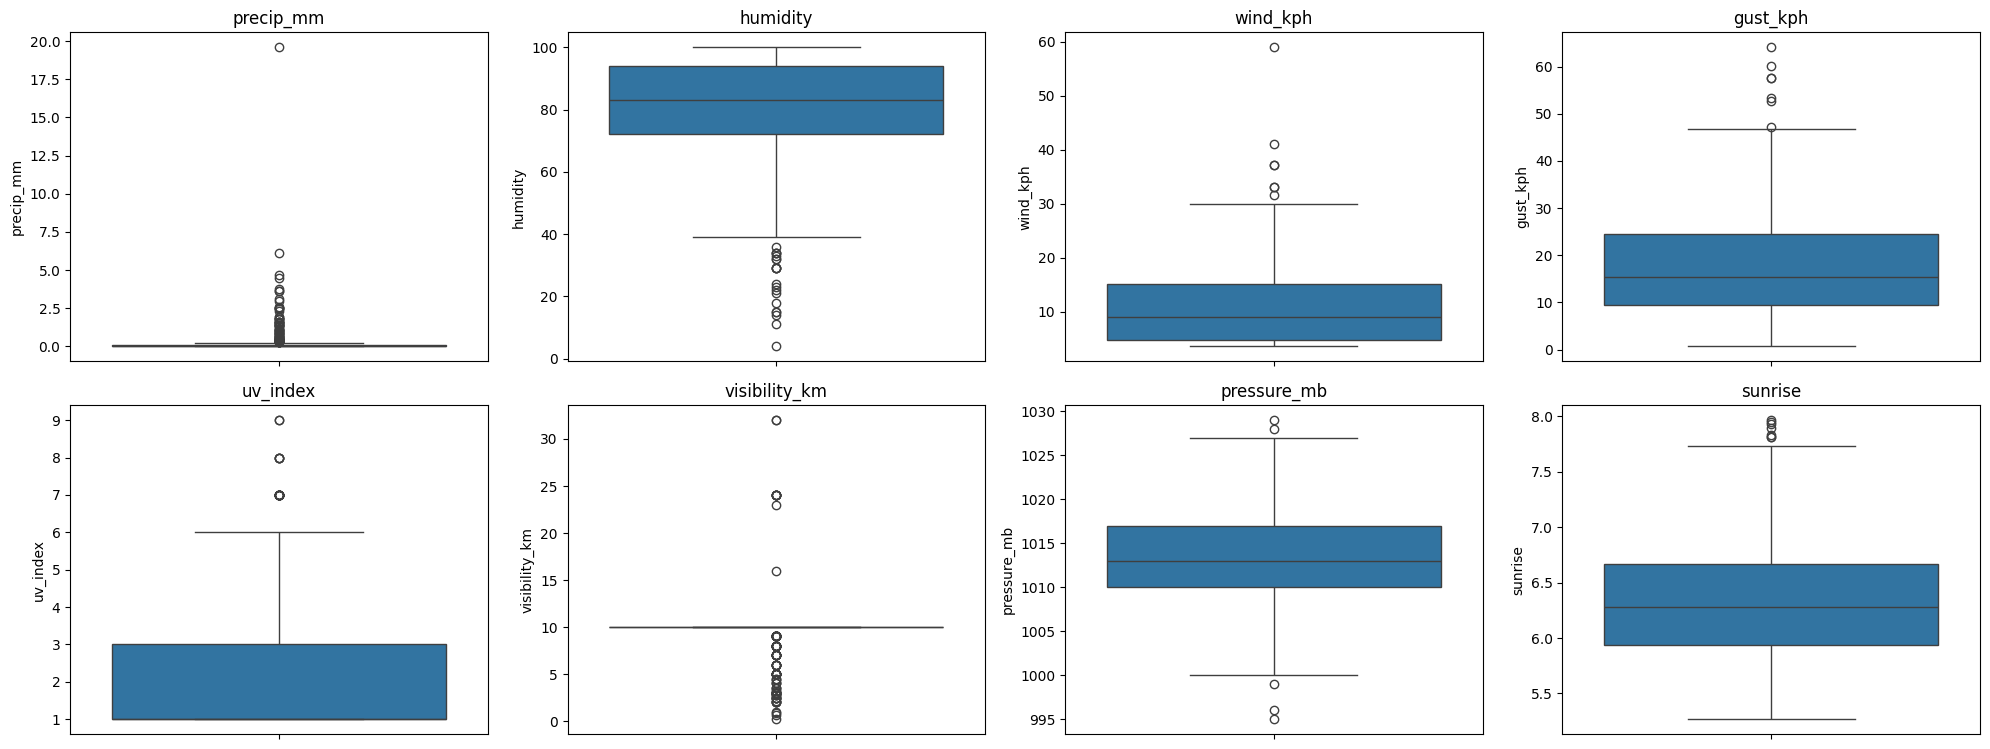

In [24]:
outlier_column= ['precip_mm', 'humidity', 'wind_kph', 'gust_kph', 'uv_index', 'visibility_km', 'pressure_mb', 'sunrise']

# Number of columns in the grid layout
num_columns = 4

# Creating a box plot for each numeric column
plt.figure(figsize=(20, 15))  # Adjust the figure size as needed
for i, column in enumerate(outlier_column, 1):
    plt.subplot(len(numeric_columns) // num_columns + 1, num_columns, i)
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [25]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers
df_cleaned = remove_outliers(df, outlier_column)

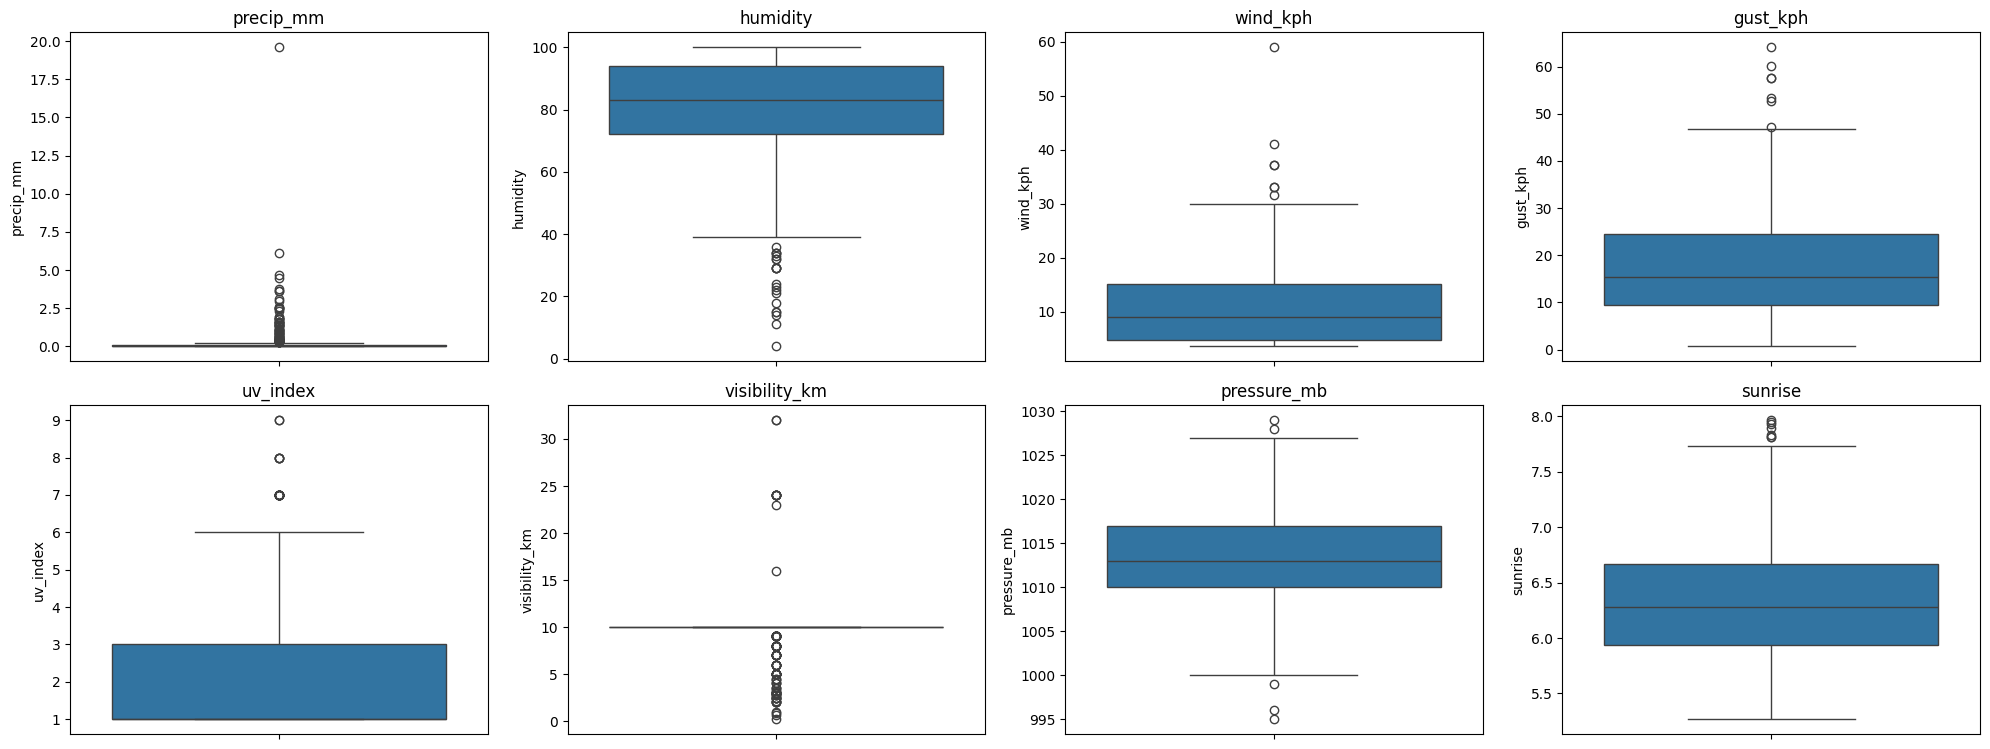

In [26]:
num_columns = 4

# Creating a box plot for each numeric column
plt.figure(figsize=(20, 15))  # Adjust the figure size as needed
for i, column in enumerate(outlier_column, 1):
    plt.subplot(len(numeric_columns) // num_columns + 1, num_columns, i)
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

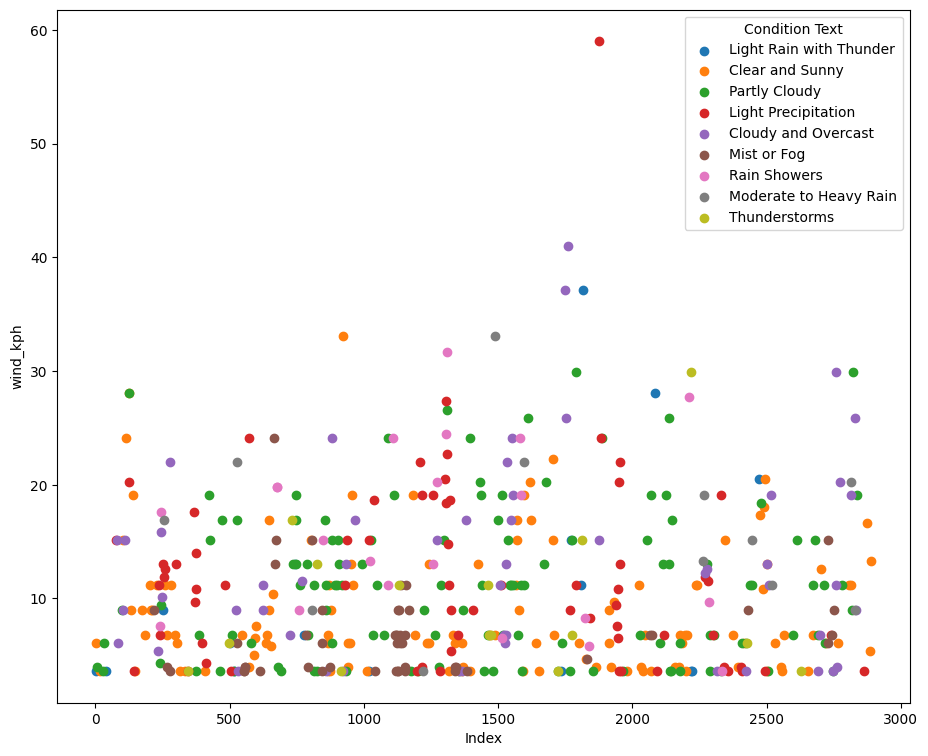

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(11, 9))

for condition in df['condition_text'].unique():
    subset = df[df['condition_text'] == condition]
    plt.scatter(subset.index, subset['wind_kph'], label=condition)

plt.xlabel('Index')
plt.ylabel('wind_kph')
plt.legend(title="Condition Text")

plt.show()


In [28]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_cols

Index(['temperature_celsius', 'wind_kph', 'wind_degree', 'pressure_mb',
       'precip_mm', 'humidity', 'cloud', 'feels_like_celsius', 'visibility_km',
       'uv_index', 'gust_kph', 'air_quality_us-epa-index', 'sunrise',
       'sunset'],
      dtype='object')

In [29]:
df['condition_text'].value_counts()

condition_text
Clear and Sunny            122
Partly Cloudy              122
Light Precipitation         68
Cloudy and Overcast         53
Mist or Fog                 50
Rain Showers                21
Light Rain with Thunder     16
Thunderstorms               15
Moderate to Heavy Rain      12
Name: count, dtype: int64

In [30]:
df['condition_text'].unique()

array(['Light Rain with Thunder', 'Clear and Sunny', 'Partly Cloudy',
       'Light Precipitation', 'Cloudy and Overcast', 'Mist or Fog',
       'Rain Showers', 'Moderate to Heavy Rain', 'Thunderstorms'],
      dtype=object)

In [31]:
condition_encoding = {
    'Light Rain with Thunder': 1,
    'Clear and Sunny': 2,
    'Partly Cloudy': 3,
    'Light Precipitation': 4,
    'Cloudy and Overcast': 5,
    'Mist or Fog': 6,
    'Rain Showers': 7,
    'Moderate to Heavy Rain': 8,
    'Thunderstorms': 9
}

# Apply the manual encoding to your DataFrame
df['condition_text_encoded'] = df['condition_text'].map(condition_encoding)

In [32]:
numeric_cols_1 = df.select_dtypes(include=[np.number]).columns
numeric_cols_1

Index(['temperature_celsius', 'wind_kph', 'wind_degree', 'pressure_mb',
       'precip_mm', 'humidity', 'cloud', 'feels_like_celsius', 'visibility_km',
       'uv_index', 'gust_kph', 'air_quality_us-epa-index', 'sunrise', 'sunset',
       'condition_text_encoded'],
      dtype='object')

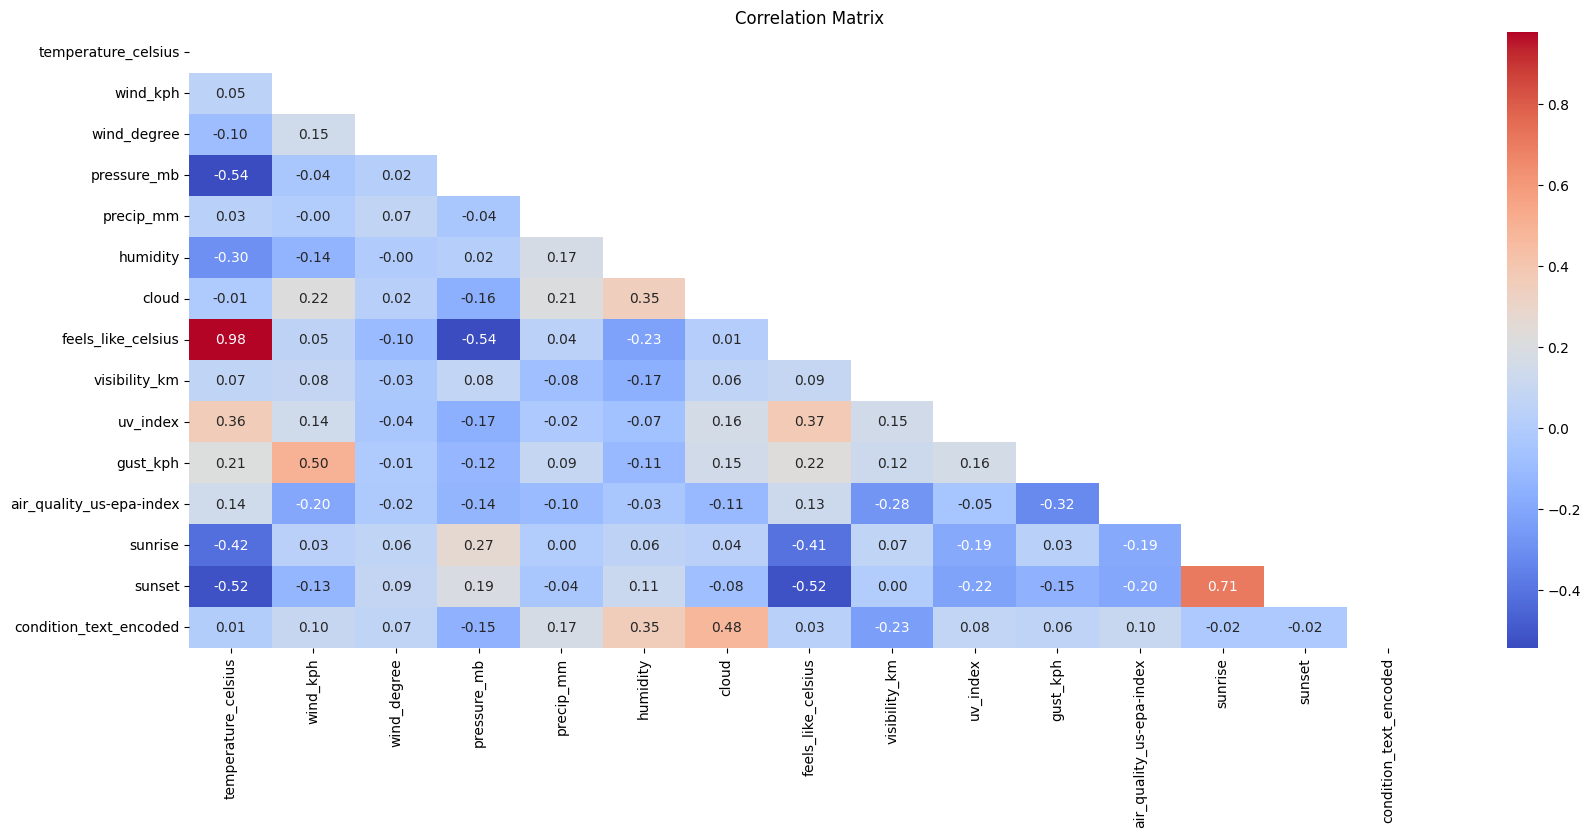

In [33]:
corr_matrix  = df[numeric_cols_1].corr()

import seaborn as sns

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',mask=mask)
plt.title('Correlation Matrix')
plt.show()


In [34]:
df['condition_text'].value_counts()

condition_text
Clear and Sunny            122
Partly Cloudy              122
Light Precipitation         68
Cloudy and Overcast         53
Mist or Fog                 50
Rain Showers                21
Light Rain with Thunder     16
Thunderstorms               15
Moderate to Heavy Rain      12
Name: count, dtype: int64

In [35]:
df['city_id'] = df['city_id'].str.extract('(\d+)')
df['city_id'] = df['city_id'].astype(int)

In [36]:
df['day'] = df['day_id'].str.extract('(\d+)')
df['day'] = df['day'].astype(int)

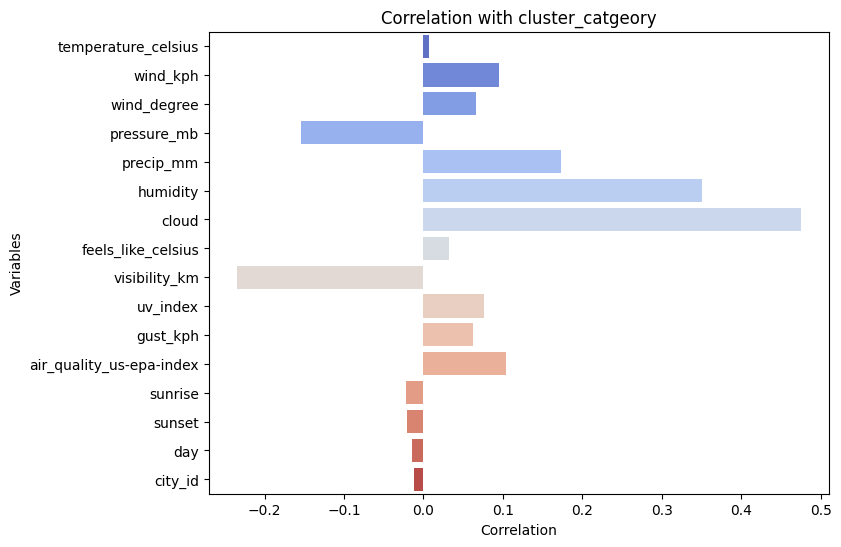

In [37]:
correlation_with_target = df[['temperature_celsius', 'wind_kph', 'wind_degree', 'pressure_mb',
       'precip_mm', 'humidity', 'cloud', 'feels_like_celsius', 'visibility_km',
       'uv_index', 'gust_kph', 'air_quality_us-epa-index', 'sunrise', 'sunset','day','city_id']].corrwith(df['condition_text_encoded'])

# Plot correlation barplot
plt.figure(figsize=(8, 6))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='coolwarm',hue = correlation_with_target.index)
plt.title('Correlation with cluster_catgeory')
plt.xlabel('Correlation')
plt.ylabel('Variables')
plt.show()

In [63]:
features = ['wind_kph', 'wind_degree', 'pressure_mb','precip_mm', 'humidity', 'cloud', 'feels_like_celsius', 'visibility_km','uv_index', 'gust_kph', 'air_quality_us-epa-index']

X = df[features]
y = df['condition_text_encoded']

In [66]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = RandomForestClassifier(random_state=42,)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8818181818181818

In [67]:
# classification report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.83      0.87      0.85        23
           2       0.94      0.97      0.95        32
           3       0.72      0.86      0.78        21
           4       0.86      0.73      0.79        26
           5       1.00      0.95      0.98        21
           6       1.00      0.90      0.95        30
           7       0.83      0.87      0.85        23
           8       0.77      0.91      0.83        22
           9       1.00      0.86      0.93        22

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.89      0.88      0.88       220



In [74]:
df_2 = pd.read_csv('daily_data.csv')
df_2.shape

(2893, 17)

In [75]:
def convert_time_to_float(time_str):
    time, period = time_str.split()
    hour, minute = map(int, time.split(':'))
    return hour + minute / 60.0

# Apply the conversion
df_2['sunrise'] = df_2['sunrise'].apply(convert_time_to_float)
df_2['sunset'] = df_2['sunset'].apply(convert_time_to_float)


df_2['city_id'] = df_2['city_id'].str.extract('(\d+)')
df_2['city_id'] = df_2['city_id'].astype(int)

df_2['day'] = df_2['day_id'].str.extract('(\d+)')
df_2['day'] = df_2['day'].astype(int)

X = df_2[features]

y_pred = clf.predict(X)

df_2['condition_text_encoded'] = y_pred



df_3 = df_2[['day_id','condition_text_encoded']]
df_3.shape

(2893, 2)

In [76]:
df_3.head()

,day_id,condition_text_encoded
0,D0001,3
1,D0002,3
2,D0003,1
3,D0004,2
4,D0005,2


In [77]:
condition_encoding = {
    'Light Rain with Thunder': 1,
    'Clear and Sunny': 2,
    'Partly Cloudy': 3,
    'Light Precipitation': 4,
    'Cloudy and Overcast': 5,
    'Mist or Fog': 6,
    'Rain Showers': 7,
    'Moderate to Heavy Rain': 8,
    'Thunderstorms': 9
}


condition_decoding = {v: k for k, v in condition_encoding.items()}
df_3['condition_text'] = df_3['condition_text_encoded'].map(condition_decoding)

/tmp/ipykernel_946/1315615678.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['condition_text'] = df_3['condition_text_encoded'].map(condition_decoding)


In [78]:
df_3['condition_text'].value_counts()

condition_text
Clear and Sunny            1162
Partly Cloudy              1034
Mist or Fog                 189
Light Precipitation         163
Cloudy and Overcast         105
Light Rain with Thunder      73
Rain Showers                 71
Thunderstorms                50
Moderate to Heavy Rain       46
Name: count, dtype: int64

In [79]:
from difflib import SequenceMatcher

def similarity_ratio(a, b):
    return SequenceMatcher(None, a, b).ratio()

# Define a threshold for considering texts as similar
threshold = 0.5

# Calculate similarity for each pair
similar_count = 0
for text1 in df_not_null['condition_text']:
    for text2 in df_3['condition_text']:
        if similarity_ratio(text1, text2) > threshold:
            similar_count += 1
            break  # Move to the next text in df_not_null after finding a match

# Calculate the percentage of similar items
percentage_similarity = (similar_count / len(df_not_null)) * 100

print(f"Percentage of similar items: {percentage_similarity:.2f}%")

Percentage of similar items: 100.00%


In [80]:
df_3[['day_id','condition_text']].to_csv('submission90RF.csv', index=False)